In [2]:
### 구글 드라이브 마운트
## Colab으로 문제 풀이를 하시는 분들만 실행해 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. GBM**
- 물 가용성 데이터를 활용합니다
- `water_potability.csv` 데이터셋을 다운로드 후 실습을 진행해 주세요.


## **1-1. 빈칸을 채워주세요. (5개)**

- 아래의 셀을 실행시킨 후에 실습을 진행해주세요
- 데이터 파일 경로 확인해주세요

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

In [6]:
### 데이터 준비

# 데이터 불러오기
water = pd.read_csv('/content/water_potability.csv')
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
# Feature, Target 분리
X = water.drop('Potability', axis = 1)
y = water['Potability']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)

print(X_train.shape, X_test.shape)

(2457, 9) (819, 9)


- GradientBoostingClassifier 클래스를 이용하여 `물 가용성 데이터 세트` 예측/분류
- GBM 학습 시간 측정


In [8]:
import numpy as np
np.isnan(X_train)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
741,False,False,False,False,False,False,False,True,False
459,False,False,False,False,False,False,False,False,False
2931,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False
1726,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1091,True,False,False,False,False,False,False,False,False
423,False,False,False,False,False,False,False,False,False
1908,True,False,False,False,True,False,False,False,False
2968,False,False,False,False,False,False,False,False,False


In [9]:
import numpy as np
import pandas as pd
X_train = X_train.fillna(X_train.mean())

In [10]:
np.isnan(X_train)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
741,False,False,False,False,False,False,False,False,False
459,False,False,False,False,False,False,False,False,False
2931,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1091,False,False,False,False,False,False,False,False,False
423,False,False,False,False,False,False,False,False,False
1908,False,False,False,False,False,False,False,False,False
2968,False,False,False,False,False,False,False,False,False


In [11]:
np.isnan(X_test)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3238,False,False,False,False,True,False,False,False,False
905,True,False,False,False,False,False,False,False,False
951,False,False,False,False,True,False,False,False,False
3045,False,False,False,False,False,False,False,False,False
1634,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
933,False,False,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
1514,False,False,False,False,True,False,False,False,False


In [12]:
X_test = X_test.fillna(X_test.mean())

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time()-start_time))

GBM 정확도: 0.6691
GBM 수행 시간: 0.9 초 


### **GridSearchCV를 이용한 하이퍼 파라미터 최적화**

📍GBM 하이퍼 파라미터
  - `loss`: 경사 하강법에서 사용할 비용 함수 지정
  - `learning_rate`: GBM이 학습을 진행할 때마다 적용하는 학습률
  - `n_estimators`: weak learner의 개수
  - `subsample`: weak learner가 학습에 사용하는 데이터의 샘플링 비율

## **1.2 아래의 파라미터가 의미하는 것을 각각 서술하세요.**


In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1],
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.6459


### 답안
- 마크다운을 풀어서 답안을 작성 해주세요.


1) 'n_estimators':[100, 500]

: 순차적으로 오류를 보정하는 weak learner의 개수로 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 순 있지만 많을수록 수행시간이 오래 걸린다. 기본값이 100이며 여기서는 100에서 500까지 간다.

2)'learning_rate' : [ 0.05, 0.1]

: GBM의 학습률로 기본값이 0.1으로 현재 설정값인 0.05와 0.1으로는 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높다.

# **2. XGBoost**

- 타이타닉 데이터를 활용합니다
- `titanic.csv` 데이터셋을 다운로드 후 실습을 진행해 주세요.

**데이터 준비**

In [15]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Titanic 데이터셋
titanic_df = pd.read_csv('/content/titanic.csv') # 파일 경로 확인

# 관련 없는 열 또는 고유한 값이 너무 많은 열 제거
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 결측값 채우기
titanic_df.fillna(method='ffill', inplace=True)  # Filling NaN values with forward fill method

# 범주형 열을 숫자로 변환(Label Encoding)
label_encoders = {}
for col in ['Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    titanic_df[col] = label_encoders[col].fit_transform(titanic_df[col])

In [18]:
# features과 target variable 분리
X_features = titanic_df.drop(columns=['Survived'])
y_label = titanic_df['Survived']

# 학습용 데이터, 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

# 데이터를 DMatrix 형식으로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

(712, 8) (179, 8)


## **2-1. XGBoost의 하이퍼 파라미터 설정에 따라 파라미터 목록을 완성해 주세요.**

- 트리의 최대 깊이: 5  
- 학습률(eta): 0.05  
- 이진 분류 문제  
  - 오류 함수의 평가 성능 지표는 `error`
- 부스팅 반복 횟수: 500회  

In [19]:
# Parameters for XGBoost model
params = { 'max_depth':5,
          'eta': 0.05,
          'objective': 'binary:logistic',
          'eval_metric': 'error'
         }

# 부스팅 반복 횟수 지정
num_rounds = 500


- 아래 코드들을 실행하여 결과를 확인해 보세요!

In [20]:
# XGBoost 모델 학습
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      evals=wlist,  verbose_eval = 0)

# 확률 예측
pred_probs = xgb_model.predict(dtest)
print('Predicted probabilities (first 10):')
print(np.round(pred_probs[:10],3))

# 확률을 예측값으로 변환
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('Predicted labels (first 10):', preds[:10])

Predicted probabilities (first 10):
[0.331 0.011 0.054 0.288 0.987 0.03  0.825 0.622 0.005 0.023]
Predicted labels (first 10): [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]


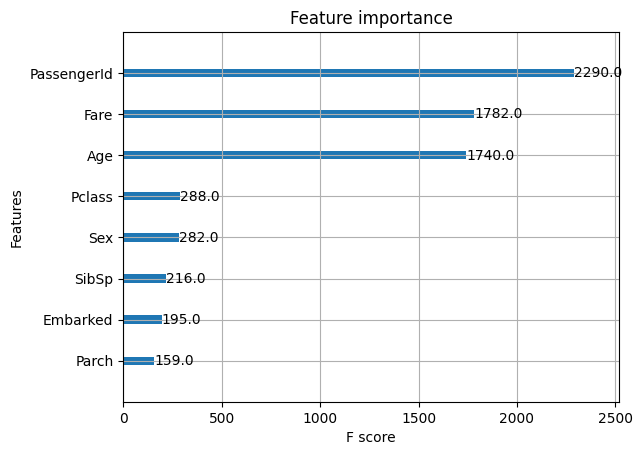

In [21]:
# Feature Importance 그리기

plot_importance(xgb_model)
plt.show()

## **2.2 파이썬 래퍼를 사용하여 XGBoost 모델을 학습할 때 입력 데이터를 특정 형식으로 변환하여 사용합니다.이 변환을 수행하는 함수는 무엇입니까?**

### **답안**  
train()

## **2.3. 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier를 사용하여 XGBoost 분류기를 학습하는 코드를 완성하세요.**
- 추정기 개수: 200
- 학습률: 0.1
- 트리의 최대 깊이: 4

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [23]:
# XGBoost 모델 학습
xgb_wrapper = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)
xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

- 아래 코드를 실행하여 결과를 확인해 보세요!

In [24]:
# 분류 모델 평가 함수 정의 및 호출

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [25]:
# 모델 평가 수행

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[96 11]
 [23 49]]
정확도: 0.8101, 정밀도: 0.8167, 재현율: 0.6806,    F1: 0.7424, AUC:0.8374


## **2-4. 아래 코드에서 조기 중단 설정이 어떻게 변경되며, 이러한 변화가 예측 성능에 미칠 수 있는 영향에 대해 서술하세요.**



In [26]:
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6)
evals = [(X_test, y_test)]

In [27]:
### 첫 번째 학습

# XGBClassifier 모델 학습 (조기 중단 설정)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

[0]	validation_0-logloss:0.63356
[1]	validation_0-logloss:0.60037
[2]	validation_0-logloss:0.57423
[3]	validation_0-logloss:0.55243
[4]	validation_0-logloss:0.53491
[5]	validation_0-logloss:0.52240
[6]	validation_0-logloss:0.51087
[7]	validation_0-logloss:0.50389
[8]	validation_0-logloss:0.49613
[9]	validation_0-logloss:0.48904
[10]	validation_0-logloss:0.48345
[11]	validation_0-logloss:0.47826
[12]	validation_0-logloss:0.47273
[13]	validation_0-logloss:0.46838
[14]	validation_0-logloss:0.46477
[15]	validation_0-logloss:0.46139
[16]	validation_0-logloss:0.45919
[17]	validation_0-logloss:0.45758
[18]	validation_0-logloss:0.45632
[19]	validation_0-logloss:0.45515
[20]	validation_0-logloss:0.45369
[21]	validation_0-logloss:0.45133
[22]	validation_0-logloss:0.44978
[23]	validation_0-logloss:0.44714
[24]	validation_0-logloss:0.44553
[25]	validation_0-logloss:0.44383
[26]	validation_0-logloss:0.44302
[27]	validation_0-logloss:0.44236
[28]	validation_0-logloss:0.44304
[29]	validation_0-loglos

In [28]:
### 두 번째 학습

# 조기 중단 설정 변경
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.63356
[1]	validation_0-logloss:0.60037
[2]	validation_0-logloss:0.57423
[3]	validation_0-logloss:0.55243
[4]	validation_0-logloss:0.53491
[5]	validation_0-logloss:0.52240
[6]	validation_0-logloss:0.51087
[7]	validation_0-logloss:0.50389
[8]	validation_0-logloss:0.49613
[9]	validation_0-logloss:0.48904
[10]	validation_0-logloss:0.48345
[11]	validation_0-logloss:0.47826
[12]	validation_0-logloss:0.47273
[13]	validation_0-logloss:0.46838
[14]	validation_0-logloss:0.46477
[15]	validation_0-logloss:0.46139
[16]	validation_0-logloss:0.45919
[17]	validation_0-logloss:0.45758
[18]	validation_0-logloss:0.45632
[19]	validation_0-logloss:0.45515
[20]	validation_0-logloss:0.45369
[21]	validation_0-logloss:0.45133
[22]	validation_0-logloss:0.44978
[23]	validation_0-logloss:0.44714
[24]	validation_0-logloss:0.44553
[25]	validation_0-logloss:0.44383
[26]	validation_0-logloss:0.44302
[27]	validation_0-logloss:0.44236
[28]	validation_0-logloss:0.44304
[29]	validation_0-loglos

### **답안**  
아래 코드에서 조기 중단 설정이 어떻게 변경되며, 이러한 변화가 예측 성능에 미칠 수 있는 영향에 대해 서술하세요
첫번째 학습에는 조기 중단 학습을 100번, 즉 100번 반복 동안 성능 평가 지수가 향상되지 않으면 반복을 멈추게 설정헀고  정확도는 0.7821를 선보였습니다. 두번째 학습에는 조기 중단값을 10초로 줄였고 따라서 46회에서 반복을 중단했고 정확도 0.7821가 나왔습니다.
원래라면 조기 중단값을 10과 같이 급격하게 줄이면 예측 성능 저하와 정확도가 낮아야 하는데 여기서는 100번과 같은 정확도를 보였습니다.

# **3. LightGBM**

## **3-1.**
- 해당 실습에서는 `피마 당뇨병` 데이터를 활용합니다.

In [29]:
### 실습을 위한 lgbm 다운그레이드
# 아래 코드를 실행시켜 주세요.

!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [30]:
# 제대로 다운그레이드 되었는지 확인

import lightgbm
print(lightgbm.__version__)

3.3.2


### **Step1) 데이터 로드**


In [31]:
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import early_stopping

In [32]:
### 아래 코드를 실행시켜 주세요.
## csv 파일 경로를 알맞게 수정해 주세요.

# data load: 피마 당뇨병 데이터 셋
diabetes = pd.read_csv('/content/diabetes.csv')
print(diabetes['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


### **Step 2) 데이터 Split**
- 아래 코드를 실행시켜 주세요.

In [33]:
y = diabetes['Outcome']
X = diabetes.drop('Outcome', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

### **Step 3) 모델 학습**
- 아래 코드의 빈칸을 채워주세요.  
(힌트 : 교재 p.251)



In [34]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss', eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.630031
[2]	valid_0's binary_logloss: 0.607335
[3]	valid_0's binary_logloss: 0.585795
[4]	valid_0's binary_logloss: 0.566393
[5]	valid_0's binary_logloss: 0.551676
[6]	valid_0's binary_logloss: 0.541892
[7]	valid_0's binary_logloss: 0.535487
[8]	valid_0's binary_logloss: 0.526912
[9]	valid_0's binary_logloss: 0.518037
[10]	valid_0's binary_logloss: 0.512287
[11]	valid_0's binary_logloss: 0.511588
[12]	valid_0's binary_logloss: 0.504413
[13]	valid_0's binary_logloss: 0.49867
[14]	valid_0's binary_logloss: 0.496196
[15]	valid_0's binary_logloss: 0.492987
[16]	valid_0's binary_logloss: 0.489374
[17]	valid_0's binary_logloss: 0.491211
[18]	valid_0's binary_logloss: 0.491578
[19]	valid_0's binary_logloss: 0.489177
[20]	valid_0's binary_logloss: 0.488728
[21]	valid_0's binary_logloss: 0.486497
[22]	valid_0's binary_logloss: 0.48802
[23]	valid_0's binary_logloss: 0.487214
[24]	valid_0's binary_logloss: 0.488736
[25]	valid_0's binary_logloss: 0.490997
[26]	valid_

LGBMClassifier(n_estimators=400)

### **Step 4) 예측**
- 아래 코드를 실행시켜 주세요.

In [35]:
# 예측
y_pred = lgbm_wrapper.predict(X_test)

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.3f}')

accuracy: 0.747


## **3-2. 예측 시각화**


### **문제**
- 다음과 같은 코드 오류가 발생했습니다.
  - 오류를 해결할 수 있는 코드를 한 줄 추가해 주세요.

```
NameError                                 Traceback (most recent call last)
Cell In[2], line 5
      2 get_ipython().run_line_magic('matplotlib', 'inline')
      4 fig, ax = plt.subplots(figsize=(10, 12))
----> 5 plot_importance(lgbm_wrapper, ax=ax)
      6 plt.show()

NameError: name 'plot_importance' is not defined
```

(힌트 : 교재 p.259)


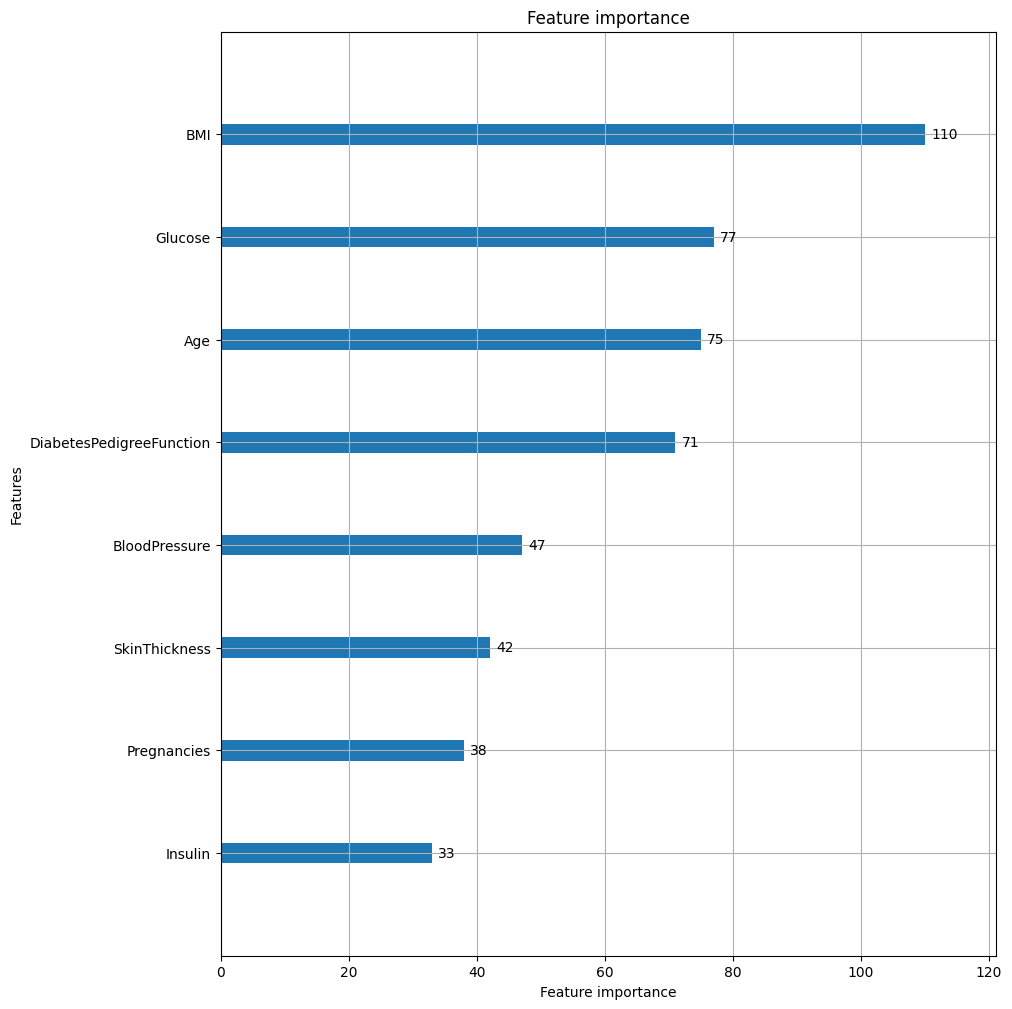

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

from lightgbm import plot_importance

# 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

# **4. 스태킹**

## **4-1. 기본 스태킹 모델**

- 아래 코드를 실행시켜 주세요.

In [37]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [38]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier 생성
lr_final = LogisticRegression(C=10)

### **Step 1) 스태킹에 활용할 개별 모델을 학습시켜 주세요.**

In [39]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

- 아래 코드를 실행시켜 주세요.

In [40]:
# 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.6688
랜덤 포레스트 정확도: 0.7468
결정 트리 정확도: 0.6883
에이다부스트 정확도: 0.7273


### **Step 2) 다음과 같이 출력되도록 `transpose`를 이용해 행과 열의 위치를 교환하는 코드를 작성해 주세요.**
   
```
(4, 154)
(154, 4)
```

(힌트 : 교재 p.281)

In [41]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환하는 코드를 작성해 주세요.
# 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듭니다.

pred = np.transpose(pred)
print(pred.shape)

(4, 154)
(154, 4)


- 아래의 코드를 실행시켜 주세요.

In [42]:
# 최종 메타 모델 학습/예측

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.7468


## **4-2. CV 기반 스태킹**



- CV 세트 기반의 스태킹은 최종 메타 모델을 위한 데이터 세트를 만들 때, 교차 검증 기반으로 예측된 결과 데이터 세트를 이용합니다.
- 또한 CV 세트 기반의 스태킹 과정은 크게 Step1과 Step2, 두가지로 나눌 수 있습니다.

### **Step1)**

**개별 모델**
- 교차검증으로 메타모델을 위한 학습용  데이터, 테스트용 데이터 생성

### **Step 2)**
- 학습용 데이터: 스태킹 형태로 합치기 → 최종 학습용 데이터 세트 생성
- 테스트용 데이터 : 스태킹 형태로 합치기 → 최종 테스트 데이터 세트 생성

**최종 모델**
- 최종 학습용 데이터 세트 + 원본 학습 데이터의 레이블 데이터를 기반으로 학습
→ 최종 테스트 데이터 세트로 예측 + 원본 테스트 데이터의 레이블 데이터와 비교해 평가   
<br/>


---

### **문제**
그렇다면,
<br/>
> **“학습용 데이터를 N개의 폴드로 나눈다”**
는 Step1과 Step2중 어느 단계에 속할까요?   

힌트 : 교재 p.283

### **👇정답을 적어주세요!**

정답 : Step 1

# 5. **HyperOpt**


- 사이킷런의 `boston 주택 가격 데이터`를 사용합니다.
- 아래의 셀을 실행시킨 후 실습을 진행해 주세요.

In [43]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [44]:
# load dataset

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

## **5.1. `train_test_split()`를 사용하여 훈련 세트와 테스트 세트로 나누어 주세요.**

- random_state = 207
- train: test = 8:2

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2,random_state=207)

---

- 이제 평가 함수를 정의하겠습니다.  
- 교재와 다르게 Regression 예측을 진행할 예정이기 때문에,` RMSE` 평가 지표를 함수로 만들어 정의합니다.

In [49]:
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## **5.2. search_space의 빈칸을 채워주세요.**

- `max_depth`: 5에서 20까지 1간격으로
- `min_child_weight`: 1에서 10까지 1간격으로  
- `learning_rate`: 0.01에서 0.2 사이 정규 분포 값
- `colsample_bytree`: 0.5에서 1 사이 정규 분포 값

In [51]:
from hyperopt import hp

# space 정의, Hyperparameter의 이름을 key 값으로 입력
search_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)
    }

## **5.3. objective_func의 빈칸을 채워주세요.**  
- `int` 타입을 가져야 하는 hyperparameter에 주의해 주세요.

In [52]:
from xgboost import XGBRegressor
from hyperopt import STATUS_OK

In [53]:
# 목적 함수 정의
def objective_func(search_space):
    model=XGBRegressor(n_estimators=100,
                       max_depth=int(search_space['max_depth']),
                       min_child_weight = int(search_space['min_child_weight']),
                       learning_rate = search_space['learning_rate'],
                       colsample_bytree = search_space['colsample_bytree'],
                      )

    evaluation = [(x_train, y_train), (x_test, y_test)]

    model.fit(x_train, y_train,
          eval_set=evaluation,
          eval_metric="rmse",
          early_stopping_rounds=20,
          verbose=0)

    pred = model.predict(x_test)
    rmse= RMSE(y_test, pred)

    # 평가 방식 선정
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

## **5.4. 성능 지표에 -1을 곱하지 않는 이유가 무엇일까요?**
(hint. 추가 교재 pdf p264)  
(hint2. RMSE는 작을수록 좋은 성능 지표이다.)

### **답안**  
이전에는 분류 예측으로 HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해야 했다. 하지만 회귀의 MAE< RMSE와 같은 성능 지표는 애초에 작을수록 좋기 때문에 반환시 01을 곱할 필요가 없다. 다시 말해 만약 0.8과 0.9 중 HyperOpt 목적 함수 반환 때는 0.9가 더 좋은 성능 지표라서 -1을 했다면 회귀에서는 애초에 작은 지표인 0.8로 반환하면 된다.

## **5.5. `fmin()`을 이용해 최적 하이퍼 파라미터를 도출하는 과정입니다.**

**빈칸을 채워주세요**

In [54]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# best에 최적의 하이퍼 파라미터를 return 받습니다.
best = fmin(fn = objective_func,
            space = search_space ,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trials,
            rstate=np.random.default_rng(seed=9))

100%|██████████| 50/50 [00:06<00:00,  7.17trial/s, best loss: 0.34813026656215057]


## **5.6. 최적의 하이퍼 파라미터를 출력해주세요.**  
- 정수형 파라미터는 정수형으로 형변환하고, 실수형 파라미터는 소수점 5자리까지만 변환해주세요

In [56]:
## 답안

print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'],5), round(best['learning_rate'],5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.6148, learning_rate:0.07626, max_depth:6, min_child_weight:9
